## Desafio 2


Construa um detector de bocejos que por meio da identificação de regiões da face calcule a área da boca e indique quando há ou não um bocejo.
Crie um contador de bocejos e que as informações sejam exibidas em tempo real utilizando uma webcam.

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
print(cv2.__version__)

#Pop-up do Matplotlib
#%matplotlib qt

#Exibição na mesma tela do Jupyter
%matplotlib inline

#plt.rcParams["figure.figsize"]\
#(8,5)

from io import BytesIO
from IPython.display import clear_output, Image, display
import PIL

import datetime

import dlib

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

3.4.2


/Users/michel.fernandes/anaconda/lib/python3.6/site-packages/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 28] No space left on device.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


Text(0.5,1,'Exemplo')

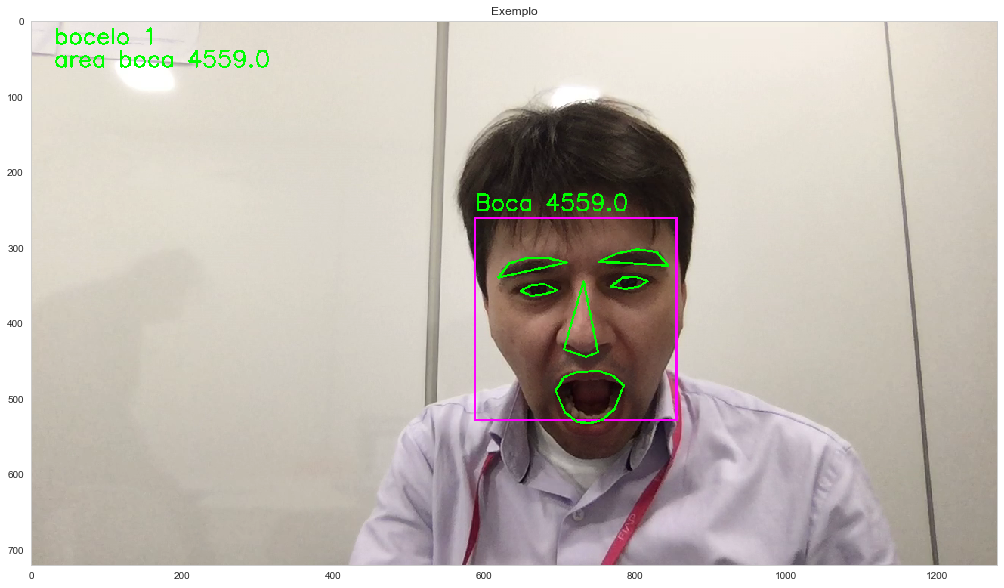

In [22]:
imagem = cv2.imread("imagens/camera_output_2.png")
plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Exemplo")

In [6]:
import dlib
import numpy 

predictor_68_path = "../modelos/shape_predictor_68_face_landmarks.dat"

classificador = dlib.shape_predictor(predictor_68_path)
detector = dlib.get_frontal_face_detector()

In [7]:
FACE = list(range(17, 68))
LABIO = list(range(48, 61))
SOMBRANCELHA_DIREITA = list(range(17, 22))
SOMBRANCELHA_ESQUERDA = list(range(22, 27))
OLHO_DIREITO = list(range(36, 42))
OLHO_ESQUERDO = list(range(42, 48))
NARIZ = list(range(27, 35))
MANDIBULA = list(range(0, 17))

In [20]:
def annotate_landmarks_convex_hull_image(im):
    im = im.copy()
    retangulos = detector(im, 1)
    
    if len(retangulos) == 0:
        return im, 0
    
    marcos = []
    
    for retangulo in retangulos:
        landmarks = np.matrix([[p.x, p.y] for p in classificador(im, retangulo).parts()])

        for k, d in enumerate(retangulos):
            cv2.rectangle(im, (d.left(), d.top()), (d.right(), d.bottom()), (255, 0, 255), 2)

            pontos = cv2.convexHull(landmarks[NARIZ])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            pontos = cv2.convexHull(landmarks[LABIO])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            area_boca = cv2.contourArea(pontos)   
            cv2.putText(im, "Boca "+str(area_boca), (d.left(),d.top()-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
            
            pontos = cv2.convexHull(landmarks[SOMBRANCELHA_DIREITA])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            pontos = cv2.convexHull(landmarks[SOMBRANCELHA_ESQUERDA])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            pontos = cv2.convexHull(landmarks[OLHO_DIREITO])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

            pontos = cv2.convexHull(landmarks[OLHO_ESQUERDO])
            cv2.drawContours(im, [pontos], 0, (0, 255, 0), 2)

    return im, area_boca

### Windows

In [ ]:
cam_capture = cv2.VideoCapture(0)

while True:
    ret, frame = cam_capture.read()
    if ret:
        frame, area_boca = annotate_landmarks_convex_hull_image(frame)

        if area_boca > 4100:
            bocejo = True
        else:
            bocejo = False

        if prev_bocejo == True and bocejo == False:
            qtde_bocejos += 1

        cv2.putText(frame, "bocelo "+str(qtde_bocejos), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
        cv2.putText(frame, "area boca "+str(area_boca), (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

        cv2.imshow("Tracos", frame)
    if cv2.waitKey(1) == 13:
        break
        
cam_capture.release()
cv2.destroyAllWindows()

### MacOS

In [21]:
#cam_capture.release()
   
cam_capture = cv2.VideoCapture(0)

qtde_bocejos = 0

bocejo = False

try:
    while True:
        ret, image_frame = cam_capture.read()
        prev_bocejo = bocejo 

        if ret:
            image_frame, area_boca = annotate_landmarks_convex_hull_image(image_frame)

            if area_boca > 4100:
                bocejo = True
            else:
                bocejo = False

            if prev_bocejo == True and bocejo == False:
                qtde_bocejos += 1

            cv2.putText(image_frame, "bocelo "+str(qtde_bocejos), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
            cv2.putText(image_frame, "area boca "+str(area_boca), (30, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
           
            image_frame = cv2.cvtColor(image_frame, cv2.COLOR_BGR2RGB)
            
            cv2.imwrite("imagens/camera_output_2.png", image_frame)
            
            img = PIL.Image.fromarray(image_frame, "RGB")
            buffer = BytesIO()
            img.save(buffer,format="JPEG")        
            display(Image(data=buffer.getvalue()))

            clear_output(wait=True)
            
except KeyboardInterrupt:
    cam_capture.release()
    print("Interrompido")

Interrompido
